In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
win = np.array([300,700,1000,1300,2000,2900,5000,9700,19000])
lose = np.array([0,100,200,300,600,1000,2000,4000,8000])

l = len(win)

dict = {'win':win, 'lose':lose}
df = pd.DataFrame(dict)

### 赢的概率随段位升高均匀分布

In [4]:
df['p'] = pd.Series(np.arange(0.9,0,-0.1))
df['e'] = pd.Series(np.multiply(win,df['p']) - lose - np.multiply(lose,np.subtract(1,df['p'])))
df['p']

0    0.9
1    0.8
2    0.7
3    0.6
4    0.5
5    0.4
6    0.3
7    0.2
8    0.1
Name: p, dtype: float64

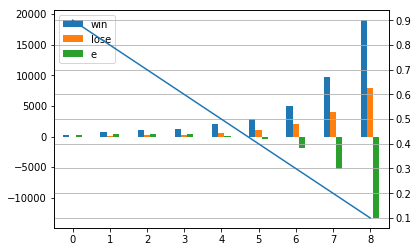

In [5]:
df.plot(kind='bar',y=['win','lose','e'])
df['p'].plot(secondary_y=True)
plt.grid(True)

In [6]:
df.iloc[np.argmax(df['e']),]

win     1000.0
lose     200.0
p          0.7
e        440.0
Name: 2, dtype: float64

### 赢的概率按指数分布

In [7]:
df['p.8'] = pd.Series([0.8**i for i in range(l)])
df['p.7'] = pd.Series([0.7**i for i in range(l)])
df['e.8'] = pd.Series(np.multiply(win,df['p.8']) - lose - np.multiply(lose,np.subtract(1,df['p.8'])))
df['e.7'] = pd.Series(np.multiply(win,df['p.7']) - lose - np.multiply(lose,np.subtract(1,df['p.7'])))
print(df['p.8'])
print(df['p.7'])

0    1.000000
1    0.800000
2    0.640000
3    0.512000
4    0.409600
5    0.327680
6    0.262144
7    0.209715
8    0.167772
Name: p.8, dtype: float64
0    1.000000
1    0.700000
2    0.490000
3    0.343000
4    0.240100
5    0.168070
6    0.117649
7    0.082354
8    0.057648
Name: p.7, dtype: float64


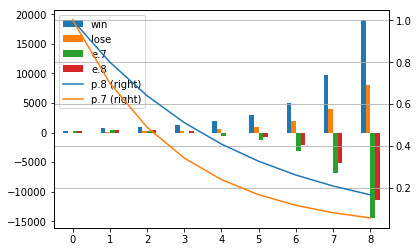

In [8]:
df.plot(kind='bar',y=['win','lose','e.7','e.8'])
df['p.8'].plot(secondary_y=True,legend=True)
df['p.7'].plot(secondary_y=True,legend=True)
plt.grid(True)

In [9]:
print('0.7^x下:')
print('win:',df.iloc[np.argmax(df['e.7']),]['win'])
print('lose:',df.iloc[np.argmax(df['e.7']),]['lose'])
print('e:',df.iloc[np.argmax(df['e.7']),]['e.7'])
print()
print('0.8^x下:')
print('win:',df.iloc[np.argmax(df['e.8']),]['win'])
print('lose:',df.iloc[np.argmax(df['e.8']),]['lose'])
print('e:',df.iloc[np.argmax(df['e.8']),]['e.8'])

0.7^x下:
win: 700.0
lose: 100.0
e: 359.99999999999994

0.8^x下:
win: 700.0
lose: 100.0
e: 440.0


### 对面的能力分布
假设每个人最大能拉人的数量是段位等级的2倍，每个队都有5个人，每个人每天拉人的数量随机  
我们队的能力是30

In [10]:
df['p2n'] = pd.Series([1 if 30>=i*10 else 30/(i*10) for i in range(1,l+1)])
df['e2n'] = pd.Series(np.multiply(win,df['p2n']) - np.multiply(lose,np.subtract(1,df['p2n'])))

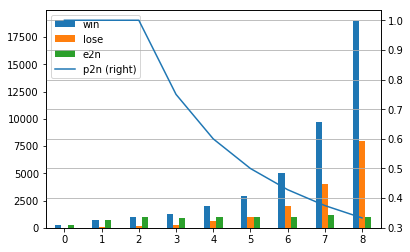

In [11]:
df.plot(kind='bar',y=['win','lose','e2n'])
df['p2n'].plot(secondary_y=True,legend=True)
plt.grid(True)

假设每个人最大能拉人的数量是1.5段位等级次方，每个队都有5个人，每个人每天拉人的数量随机

In [12]:
df['p2^n'] = pd.Series([1 if 30>=5*1.5**i else 30/(5*1.5**i) for i in range(1,l+1)])
df['e2^n'] = pd.Series(np.multiply(win,df['p2^n']) - np.multiply(lose,np.subtract(1,df['p2^n'])))

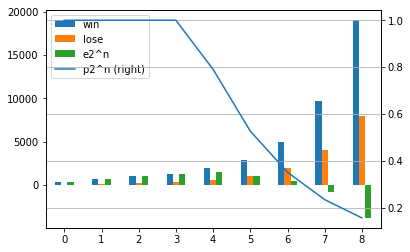

In [13]:
df.plot(kind='bar',y=['win','lose','e2^n'])
df['p2^n'].plot(secondary_y=True,legend=True)
plt.grid(True)

In [14]:
def result(current_level, current_energy, is_win=None, force_level=9):
    if is_win is None:
        a = 0
    else:
        if is_win:
            current_level += 1
            if current_level > force_level:
                current_level -= 1
            current_energy += win[current_level-1] - lose[current_level-1]
        else:
            current_energy -= lose[current_level-1]
            while current_energy<lose[current_level-1]:
                current_level -= 1
    return current_level, current_energy

In [15]:
search = pd.DataFrame(columns=['win_lose','level','energy','last_lose'])
init_level = 5
init_energy = 2067
FORCE_LEVEL = 7

for i in range(256):
    s = bin(i).replace('0b','').zfill(8)
    level = []
    l = init_level
    en = init_energy
    save = True
    for c in s:
        if c=='0':
            l, en = result(l, en, False, FORCE_LEVEL)
        elif c=='1' and l<FORCE_LEVEL:
            l, en = result(l, en, True, FORCE_LEVEL)
        else:
            save = False
            continue
        level.append(l)
    if save:
        if i%2 ==0:
            search.loc[i] = [s, level, en, '-']
        else:
            last = search.loc[i-1]['energy']-en
            search.loc[i] = [s, level, en, last]
    

search.sort_values(by='energy',ascending=False)[:60]

,win_lose,level,energy,last_lose
23,00010111,"[5, 5, 3, 4, 4, 5, 6, 7]",7267,-4000
27,00011011,"[5, 5, 3, 4, 5, 5, 6, 7]",6967,-4000
135,10000111,"[6, 6, 6, 5, 4, 5, 6, 7]",6667,-4000
71,01000111,"[5, 6, 6, 6, 4, 5, 6, 7]",6667,-4000
29,00011101,"[5, 5, 3, 4, 5, 6, 6, 7]",6567,-4000
147,10010011,"[6, 6, 6, 7, 7, 5, 6, 7]",5867,-4000
163,10100011,"[6, 6, 7, 7, 6, 5, 6, 7]",5867,-4000
30,00011110,"[5, 5, 3, 4, 5, 6, 7, 7]",5567,-
197,11000101,"[6, 7, 7, 7, 5, 6, 6, 7]",4867,-4000
37,00100101,"[5, 5, 6, 6, 5, 6, 6, 7]",4667,-4000


### 使用Q-Learning进行学习并模拟

In [16]:
import numpy as np


MAX_DAY = 8
INIT_ENERGY = 2067
INIT_LEVEL = 4
OUTPUT = False
MAX_ITER = 20001
TEST_NUM = 10


# Q 矩阵初始化
q = np.matrix(np.zeros([10, 10]))
q += INIT_ENERGY

# Reward 矩阵为提前定义好的。 类似与HMM的生成矩阵。-1表示无相连接的边
r = np.matrix([[    0,  300,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1], 
               [   -1, -100,  600,   -1,   -1,   -1,   -1,   -1,   -1,   -1], 
               [   -1,   -1, -200,  800,   -1,   -1,   -1,   -1,   -1,   -1], 
               [   -1,   -1,   -1, -300, 1000,   -1,   -1,   -1,   -1,   -1], 
               [   -1,   -1,   -1,   -1, -600, 1400,   -1,   -1,   -1,   -1], 
               [   -1,   -1,   -1,   -1,   -1,-1000, 1900,   -1,   -1,   -1], 
               [   -1,   -1,   -1,   -1,   -1,   -1,-2000, 3000,   -1,   -1], 
               [   -1,   -1,   -1,   -1,   -1,   -1,   -1,-4000, 5700,   -1], 
               [   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,-8000,11000], 
               [   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1]])
win_rate = [0.7**i for i in range(9)]


# hyperparameter
#折扣因子
gamma = 0
#是否选择最后策略的概率
epsilon = 0.4


def updateQ(state, action):
    q[state, action] = r[state, action] + gamma * q[action].max()
#     q[state, action] = r[state, action] + q[state, action]


# the main training loop
for episode in range(MAX_ITER):
    
#     # random initial state
#     state = np.random.randint(0, 9)
    state = INIT_LEVEL
    day = 0
    en = INIT_ENERGY
    
    while (day<MAX_DAY): 
        # 选择可能的动作
        # Even in random case, we cannot choose actions whose r[state, action] = -1.
        possible_actions = []
        possible_q = []
        for action in range(10):
            if r[state, action] >= 0:
                possible_actions.append(action)
                possible_q.append(q[state, action])

        # Step next state, here we use epsilon-greedy algorithm.
        action = -1
        if np.random.random() < epsilon:
            # choose random action
            action = possible_actions[np.random.randint(0, len(possible_actions))]
        else:
            # greedy
            action = possible_actions[np.argmax(np.asarray(possible_q))]
        
        if state != action:
            if np.random.random()>win_rate[state]:
                action = state
        
        # Update Q value
        if episode < MAX_ITER - TEST_NUM:
            updateQ(state, action)
        else:
            res = r[state, action]
        
        if action == 9:
            action = 8
        if state == action:
            while q[state, action] < abs(r[state, action]):
                action -= 1

        # Go to the next state
        state = action
        day += 1
        
        if episode >= MAX_ITER - TEST_NUM:
            en += res
#             print('level:',action+1, INIT_ENERGY)

    if episode >= MAX_ITER - TEST_NUM:
        print('temp:',en)
        
        
    # Display training progress
    if (OUTPUT and (episode % 10000 == 0)) or (episode == MAX_ITER - 1):
        print("------------------------------------------------")
        print("Training episode: %d" % episode)
#         print(q)
        for row in q:
            print(row.max())


temp: 2367
temp: 2367
temp: 2567
temp: 2467
temp: 2567
temp: 2367
temp: 1967
temp: 2567
temp: 2267
temp: 1967
------------------------------------------------
Training episode: 20000
2067.0
2067.0
2067.0
2067.0
2067.0
2067.0
3000.0
5700.0
2067.0
2067.0
